### 1.2.1. Sampling and Mass Data Processing

In this section, we perform sampling and processing of mass data from a dataset, followed by comprehensive visualization to understand the distribution and duplication of mass entries. The workflow includes:

- **Data Loading and Filtering**: Imports mass data from a CSV file, excluding specific items based on a predefined exclusion list.
- **Data Sampling**: Generates a combined mass dataset by prefixing item names with directional labels (`ver`, `hor`, `dia`) and performs random sampling to select a specified number of entries.
- **Data Saving**: Saves the sampled mass data into compressed `.npz` files for further analysis.
- **Statistical Analysis**: Calculates minimum, maximum, and mean mass values for the combined mass dataset.
- **Visualization**:
  - **Histograms**: Plots histograms to visualize the distribution of mass values in the combined mass data.
  - **Violin Plots**: Creates violin plots to illustrate the density and distribution of mass values.
  - **Directional Distribution**: Analyzes and visualizes the distribution of directional prefixes (`Vertical`, `Horizontal`, `Diagonal`) in the sampled data.
  
By executing these steps, we ensure a robust sampling process, maintain data quality by removing duplicates, and gain valuable insights into the mass distribution across different directions and categories.


Total possible combined_mass_data entries: 6315
Sampled combined_mass_data saved successfully
Combined Mass - Min: 0.56 kg, Max: 2.41 kg, Mean: 1.23 kg


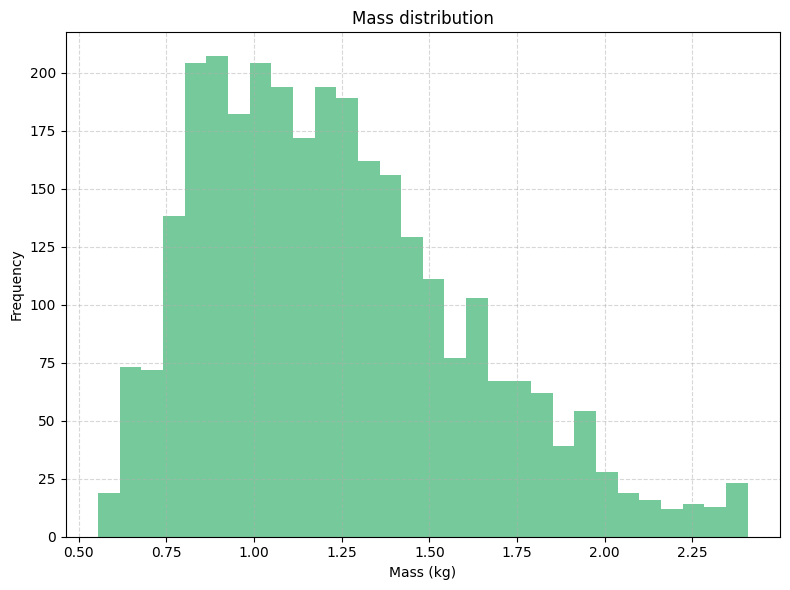

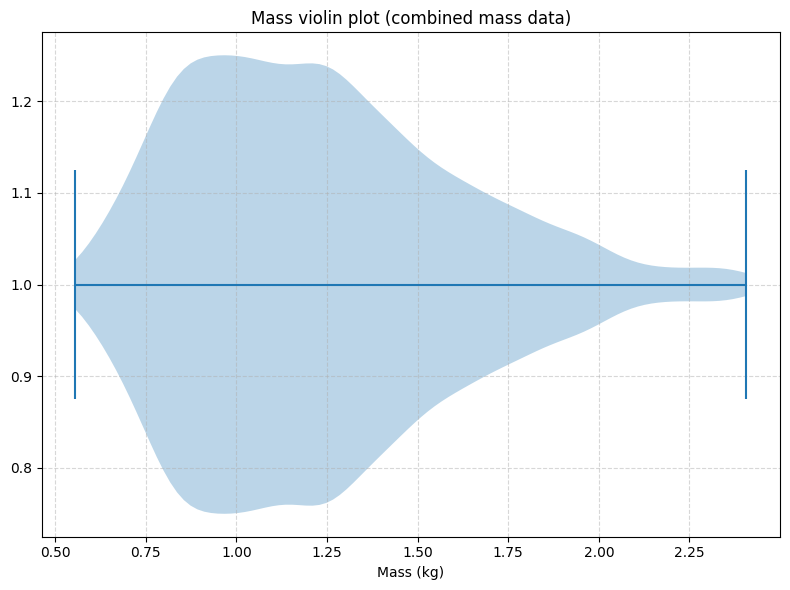


Directional counts:
Vertical: 969
Horizontal: 1009
Diagonal: 1022


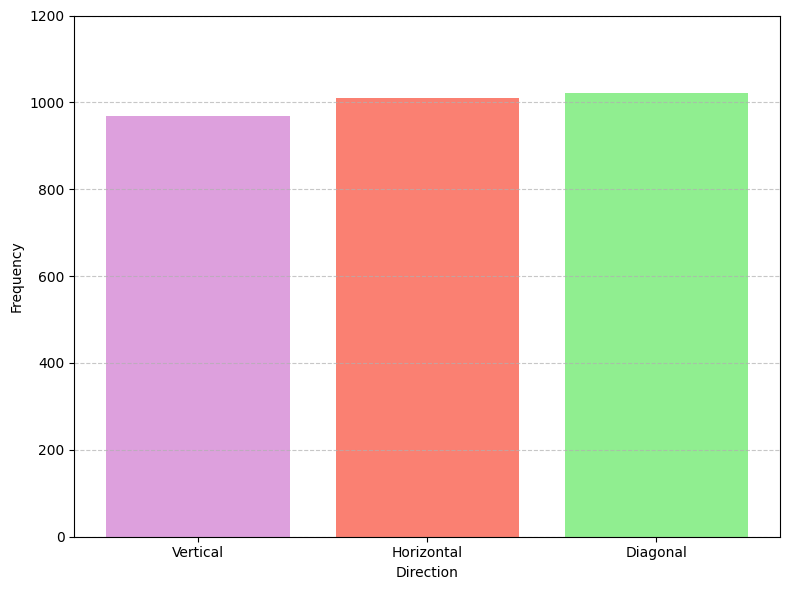


Number of excluded items: 33
Number of entries in combined_mass_data: 3000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

# Set a random seed for reproducibility
np.random.seed(42)
# np.random.seed(2024)

# Define the number of samples to generate
number_of_samples = 3000

# Define file paths
csv_file_path = '../data/bracket_labels.csv'
combined_mass_path = f'../data/npy/combined_{number_of_samples}_mass.npz'
base_figures = '../figures/'

# Create the directory for saving figures if it doesn't exist
os.makedirs(base_figures, exist_ok=True)

# List of item names to exclude from sampling
union_list = [
    '102_240', '138_14', '149_256', '20_476', '200_610', '208_139', '225_120', '247_440', '249_321', '25_234', 
    '280_556', '285_628', '293_424', '322_257', '348_556', '377_14', '377_82', '416_78', '421_466', '474_564', 
    '486_507', '497_153', '506_25', '506_533', '527_8', '533_16', '536_282', '560_454', '56_324', '570_548', 
    '623_129', '625_289', '72_209'
]

# Load the CSV file, selecting only the "item_name" and "mass(kg)" columns
df = pd.read_csv(csv_file_path, usecols=["item_name", "mass(kg)"])

# Remove excluded items from the dataframe
df_filtered = df[~df["item_name"].isin(union_list)]
one_mass_data = dict(zip(df_filtered["item_name"], df_filtered["mass(kg)"]))
sorted_one_mass_data = dict(sorted(one_mass_data.items()))

# Create combined_mass_data by prefixing each item name with 'ver', 'hor', and 'dia'
combined_mass_data_full = {}
prefixes = ['ver', 'hor', 'dia']
for item_name, mass in sorted_one_mass_data.items():
    for prefix in prefixes:
        combined_mass_data_full[f"{prefix}_{item_name}"] = mass

# Calculate the total number of possible combined_mass_data entries
total_possible = len(combined_mass_data_full)
print(f"Total possible combined_mass_data entries: {total_possible}")

# Ensure there are enough entries to sample the desired number of items
if total_possible < number_of_samples:
    raise ValueError(f"Not enough combined_mass_data entries to sample {number_of_samples} items. Available: {total_possible}")

# Perform random sampling without replacement
sampled_keys_combined = np.random.choice(
    list(combined_mass_data_full.keys()), 
    size=number_of_samples, 
    replace=False
)
sampled_combined_mass = {key: combined_mass_data_full[key] for key in sampled_keys_combined}

# Save the sampled combined_mass_data to a compressed .npz file
np.savez(combined_mass_path, **sampled_combined_mass)
print("Sampled combined_mass_data saved successfully")

# Extract mass values for analysis
combined_mass_values = list(sampled_combined_mass.values())

# Calculate and print minimum, maximum, and mean mass values for combined_mass_data
min_combined_mass = np.min(combined_mass_values)
max_combined_mass = np.max(combined_mass_values)
mean_combined_mass = np.mean(combined_mass_values)

print(f"Combined Mass - Min: {min_combined_mass:.2f} kg, Max: {max_combined_mass:.2f} kg, Mean: {mean_combined_mass:.2f} kg")

# Visualize the mass distribution for combined_mass_data using a histogram
plt.figure(figsize=(8, 6))
plt.hist(combined_mass_values, bins=30, color='mediumseagreen', alpha=0.7)
plt.title('Mass distribution')
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(base_figures, 'distribution_mass.png'))
plt.show()

# Create a violin plot for combined_mass_data
plt.figure(figsize=(8, 6))
plt.violinplot(combined_mass_values, vert=False)
plt.title('Mass violin plot (combined mass data)')
plt.xlabel('Mass (kg)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Additional Visualization: Distribution of prefixes
# Count the number of 'ver', 'hor', and 'dia' prefixes in sampled_combined_mass
prefix_counts = {'ver': 0, 'hor': 0, 'dia': 0}
for key in sampled_combined_mass.keys():
    prefix = key.split('_', 1)[0]
    if prefix in prefix_counts:
        prefix_counts[prefix] += 1

# Map prefixes to their full forms
direction_labels = {'ver': 'Vertical', 'hor': 'Horizontal', 'dia': 'Diagonal'}
adjusted_prefix_counts = {direction_labels[key]: value for key, value in prefix_counts.items()}

# Print the counts of each direction
print("\nDirectional counts:")
for direction, count in adjusted_prefix_counts.items():
    print(f"{direction}: {count}")

# Create a bar chart for the directional distribution
plt.figure(figsize=(8, 6))
plt.bar(adjusted_prefix_counts.keys(), adjusted_prefix_counts.values(), color=['plum', 'salmon', 'lightgreen'])
plt.xlabel('Direction')
plt.ylabel('Frequency')
plt.ylim(0, 1200)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(base_figures, f'distribution_{number_of_samples}_directions.png'))
plt.show()

# Print the number of excluded items and entries in combined_mass_data
print(f"\nNumber of excluded items: {len(union_list)}")
print(f"Number of entries in combined_mass_data: {len(combined_mass_values)}")


### 1.2.2. Node Count Analysis and Visualization

In this section, we analyze the distribution of node counts across different datasets and visualize the results using violin plots and histograms. The workflow includes:

- **Data Loading**: Imports node data from a compressed `.npz` file.
- **Statistical Analysis**: Calculates minimum, maximum, and mean node counts.
- **Visualization**: Generates a violin plot and histogram to illustrate the distribution of node counts.


Number of sampled combined mass entries: 3000
Min node count: 127629
Max node count: 380709
Mean node count: 210321.262


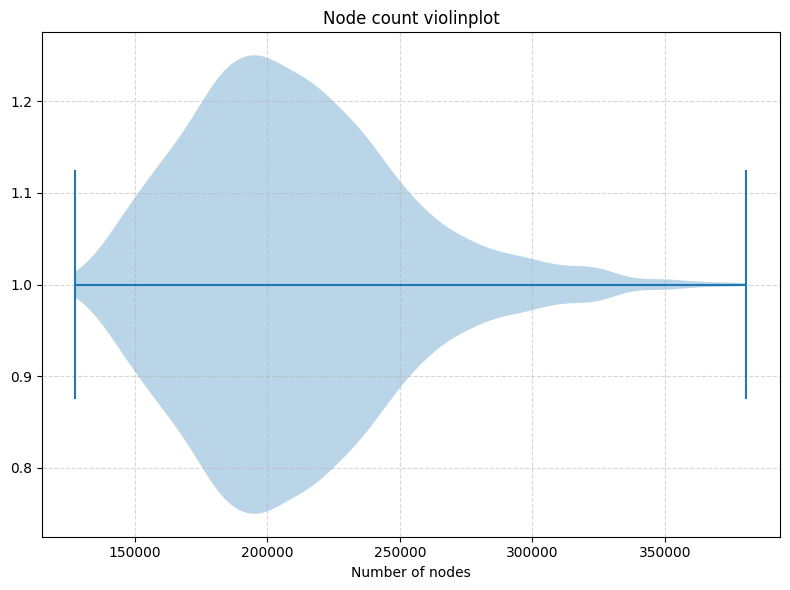

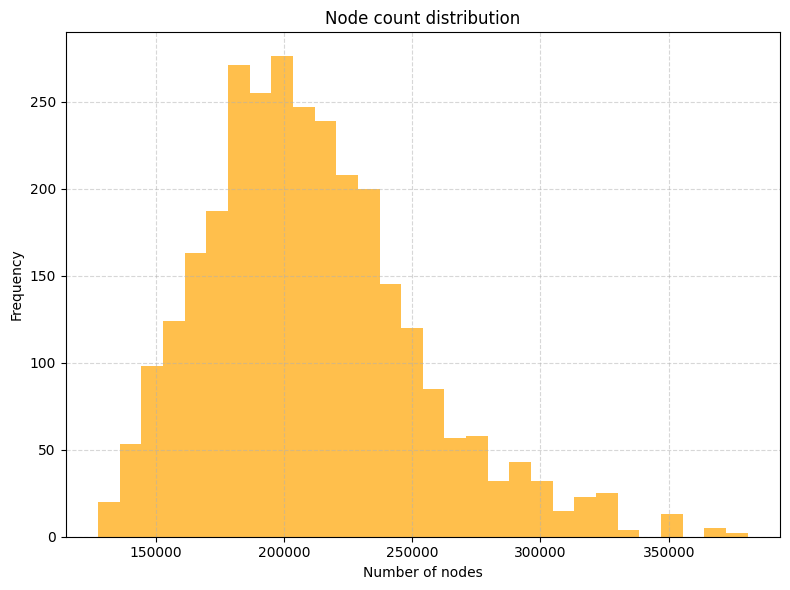

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 

# Define paths and parameters
number_of_samples = 3000  # Ensure this matches the number_of_samples used in the first script
sampled_combined_mass_path = f'../data/npy/combined_{number_of_samples}_mass.npz'
xyzdmlc_path = '../data/npy/xyzdmlc.npz'
base_figures = '../figures/'

# Create the directory for saving figures if it doesn't exist
os.makedirs(base_figures, exist_ok=True)

# Load sampled combined mass data
sampled_combined_mass = np.load(sampled_combined_mass_path)
sampled_keys = set(sampled_combined_mass.keys())
print(f"Number of sampled combined mass entries: {len(sampled_keys)}")

# Load additional data from xyzdmlc.npz
data = np.load(xyzdmlc_path)

# Initialize lists to store node counts and track missing keys
node_counts = []
missing_keys = []

# Iterate over sampled keys and collect node counts from xyzdmlc.npz
for key in sampled_keys:
    if key in data:
        sdf_with_points = data[key]
        
        # Ensure that the data has at least two dimensions
        if sdf_with_points.ndim == 2:
            node_count = sdf_with_points.shape[0]
            node_counts.append(node_count)
        else:
            print(f"Warning: Data for key '{key}' does not have 2 dimensions. Skipping.")
    else:
        missing_keys.append(key)

# Check for any missing keys and notify the user
if missing_keys:
    print(f"Warning: {len(missing_keys)} sampled keys not found in xyzdmlc.npz")

# Compute and display statistics if node_counts is not empty
if node_counts:
    min_nodes = np.min(node_counts)
    max_nodes = np.max(node_counts)
    mean_nodes = np.mean(node_counts)

    print(f"Min node count: {min_nodes}")
    print(f"Max node count: {max_nodes}")
    print(f"Mean node count: {mean_nodes}")
else:
    print("No node counts to process.")

# Create a violin plot for node counts
plt.figure(figsize=(8, 6))
plt.violinplot(node_counts, vert=False)
plt.title('Node count violinplot')
plt.xlabel('Number of nodes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Create a histogram for node counts
plt.figure(figsize=(8, 6))
plt.hist(node_counts, bins=30, color='orange', alpha=0.7)
plt.title('Node count distribution')
plt.xlabel('Number of nodes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(base_figures, 'distribution_node_sampled.png'))
plt.show()


### 1.2.3. Sampling and Mass Data Processing

In this section, we perform sampling and processing of mass data from a dataset, followed by comprehensive visualization to understand the distribution of mass entries. The workflow includes:

- **Data Loading and Filtering**: Imports mass data from a CSV file, excluding specific items based on a predefined exclusion list.
- **Data Sampling**: Generates a combined mass dataset by prefixing item names with directional labels (`ver`, `hor`, `dia`) and performs random sampling to select a specified number of entries.
- **Data Saving**: Saves the sampled mass data into a compressed `.npz` file for further analysis.
- **Statistical Analysis**: Calculates minimum, maximum, and mean mass values for the combined mass dataset.
- **Visualization**:
  - **Histograms**: Plots histograms to visualize the distribution of mass values in the combined mass data.
  - **Violin Plots**: Creates violin plots to illustrate the density and distribution of mass values.
  - **Directional Distribution**: Analyzes and visualizes the distribution of directional prefixes (`Vertical`, `Horizontal`, `Diagonal`) in the sampled data.
  
By executing these steps, we ensure a robust sampling process, maintain data quality by removing duplicates, and gain valuable insights into the mass distribution across different directions and categories.




Number of training keys: 2400
Number of validation keys: 600
Train/Valid split saved in ../data/npy/combined_3000_split_random_train_valid.npz

Unique total item names: 1785

Unique training item names: 1591
Unique validation item names: 538


/tmp/ipykernel_345330/1262257847.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


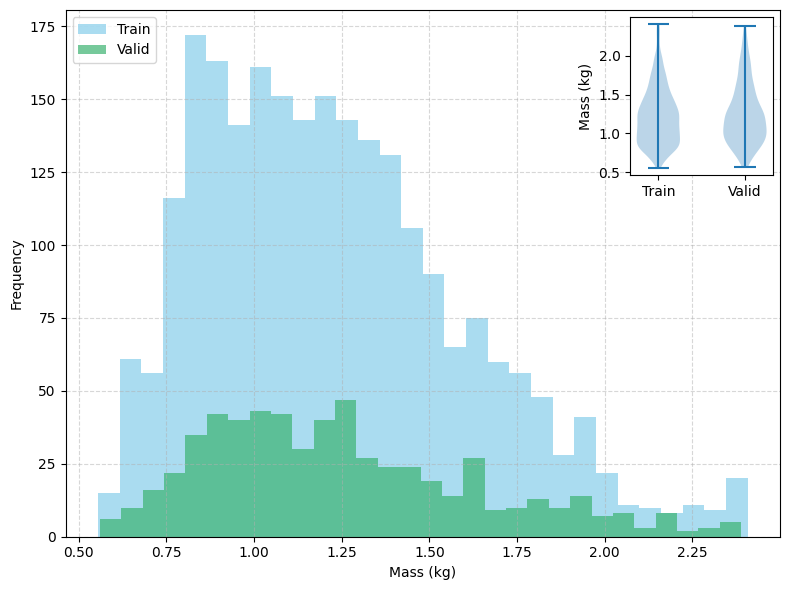

Train Mass - Min: 0.56, Max: 2.41, Mean: 1.23
Valid Mass - Min: 0.56, Max: 2.39, Mean: 1.25


/tmp/ipykernel_345330/1262257847.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


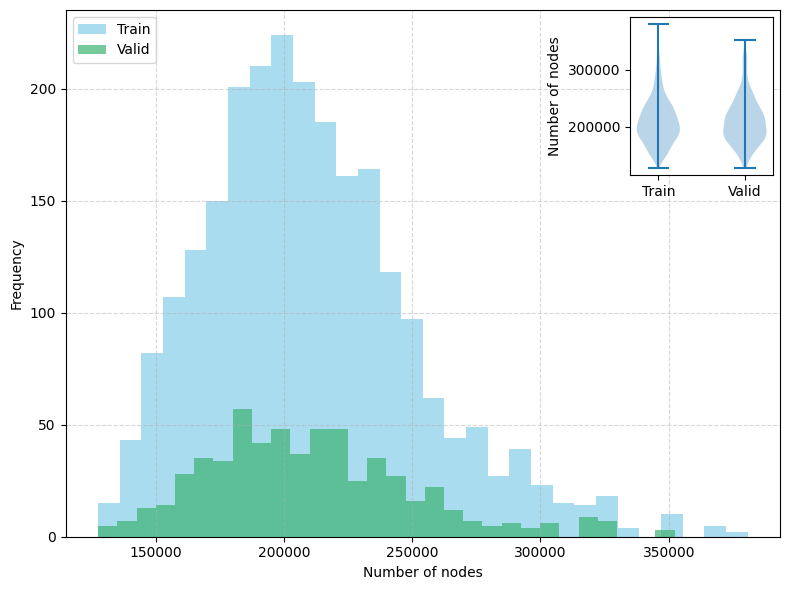

Train Node Count - Min: 127629, Max: 380709, Mean: 210236.51
Valid Node Count - Min: 127629, Max: 352321, Mean: 210660.28


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os


# Set a random seed for reproducibility
np.random.seed(42)

# Define split type and number of samples
split_text = 'random'
number_of_samples = 3000

# Define file paths
combined_mass_path = f'../data/npy/combined_{number_of_samples}_mass.npz'
xyz_npy_path = '../data/npy/xyzdmlc.npz'
split_output_file = f'../data/npy/combined_{number_of_samples}_split_{split_text}_train_valid.npz'
base_figures = '../figures/'

# Create the directory for saving figures if it doesn't exist
os.makedirs(base_figures, exist_ok=True)

# Load combined mass data
combined_mass_data = np.load(combined_mass_path)
combined_mass_data = {key: combined_mass_data[key].item() for key in combined_mass_data.files}
sorted_combined_mass_data = dict(sorted(combined_mass_data.items(), key=lambda item: item[1]))
combined_keys = list(sorted_combined_mass_data.keys())

# Shuffle keys if split type is random
if split_text == "random":
    np.random.shuffle(combined_keys)  # Shuffle the list of keys randomly

# Split the data into training and validation sets (80% train, 20% valid)
combined_split_idx = int(len(combined_keys) * 0.8)
combined_train_keys = combined_keys[:combined_split_idx]
combined_valid_keys = combined_keys[combined_split_idx:]

print("\n\nNumber of training keys:", len(combined_train_keys))
print("Number of validation keys:", len(combined_valid_keys))

# Save the training and validation split
np.savez(split_output_file, train=combined_train_keys, valid=combined_valid_keys)
print(f"Train/Valid split saved in {split_output_file}")

# Function to extract unique item names by removing prefixes
def extract_unique_item_names(prefixed_keys):
    item_names = [key.split('_', 1)[1] for key in prefixed_keys]
    unique_item_names = list(set(item_names))
    return unique_item_names

# Extract unique item names from combined, training, and validation keys
combined_item_names = extract_unique_item_names(combined_keys)
train_item_names = extract_unique_item_names(combined_train_keys)
valid_item_names = extract_unique_item_names(combined_valid_keys)

print("\nUnique total item names:", len(combined_item_names))
print("\nUnique training item names:", len(train_item_names))
print("Unique validation item names:", len(valid_item_names))

# Function to retrieve mass values based on keys
def get_mass_values(keys, mass_dict):
    return [mass_dict[key] for key in keys]

# Get mass values for training and validation keys
combined_train_mass_values = get_mass_values(combined_train_keys, combined_mass_data)
combined_valid_mass_values = get_mass_values(combined_valid_keys, combined_mass_data)

# Create a figure for mass distribution
plt.figure(figsize=(8, 6))  # Increased figure size for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Create histogram for training and validation mass distributions
ax_hist = plt.subplot(1, 1, 1)
ax_hist.hist(combined_train_mass_values, bins=30, alpha=0.7, label='Train', color='skyblue')
ax_hist.hist(combined_valid_mass_values, bins=30, alpha=0.7, label='Valid', color='mediumseagreen')
ax_hist.set_xlabel('Mass (kg)')
ax_hist.set_ylabel('Frequency')

# Add a violin plot inset to show distribution density
ax_inset = inset_axes(ax_hist, width="20%", height="30%", loc='upper right')
ax_inset.violinplot([combined_train_mass_values, combined_valid_mass_values])
ax_inset.set_ylabel('Mass (kg)')
ax_inset.set_xticks([1, 2])
ax_inset.set_xticklabels(['Train', 'Valid'])

# Add legend to the histogram
ax_hist.legend(loc='upper left')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(os.path.join(base_figures, 'distribution_mass_split.png'))
plt.show()

# Print mass statistics for training and validation sets
print(f"Train Mass - Min: {min(combined_train_mass_values):.2f}, Max: {max(combined_train_mass_values):.2f}, Mean: {np.mean(combined_train_mass_values):.2f}")
print(f"Valid Mass - Min: {min(combined_valid_mass_values):.2f}, Max: {max(combined_valid_mass_values):.2f}, Mean: {np.mean(combined_valid_mass_values):.2f}")

# Step 5: Node Count Distribution Visualization

# Load XYZ data for node counts
xyz_data = np.load(xyz_npy_path)

# Function to retrieve node counts based on keys
def get_node_counts(keys, data):
    node_counts = []
    for key in keys:
        if key in data:
            sdf_with_points = data[key]
            node_counts.append(sdf_with_points.shape[0])  # Extract node count
        else:
            print(f"Key {key} not found in data.")
    return node_counts

# Get node counts for training and validation keys
train_node_counts = get_node_counts(combined_train_keys, xyz_data)
valid_node_counts = get_node_counts(combined_valid_keys, xyz_data)

# Create a figure for node count distribution
plt.figure(figsize=(8, 6))
plt.grid(True, linestyle='--', alpha=0.5)

# Create histogram for node count distributions
ax_hist_node = plt.subplot(1, 1, 1)
ax_hist_node.hist(train_node_counts, bins=30, alpha=0.7, label='Train', color='skyblue')
ax_hist_node.hist(valid_node_counts, bins=30, alpha=0.7, label='Valid', color='mediumseagreen')
ax_hist_node.set_xlabel('Number of nodes')
ax_hist_node.set_ylabel('Frequency')

# Add a violin plot inset to show distribution density
ax_inset_node = inset_axes(ax_hist_node, width="20%", height="30%", loc='upper right')
ax_inset_node.violinplot([train_node_counts, valid_node_counts])
ax_inset_node.set_ylabel('Number of nodes')
ax_inset_node.set_xticks([1, 2])
ax_inset_node.set_xticklabels(['Train', 'Valid'])

# Add legend to the histogram
ax_hist_node.legend(loc='upper left')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(os.path.join(base_figures, 'distribution_node_split.png'))
plt.show()

# Print node count statistics for training and validation sets
if train_node_counts and valid_node_counts:
    print(f"Train Node Count - Min: {min(train_node_counts)}, Max: {max(train_node_counts)}, Mean: {np.mean(train_node_counts):.2f}")
    print(f"Valid Node Count - Min: {min(valid_node_counts)}, Max: {max(valid_node_counts)}, Mean: {np.mean(valid_node_counts):.2f}")
else:
    print("No node counts to display.")
